<h1>Experiment 2 : Probablity Distrubution</h1>

<p>Pragnesh Barik - U21ME021</p>

In [15]:
import random
import math
import numpy as np
import pandas as pd
import scipy.special
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [16]:
def NP_r(counter, n, trials) :
    count_dict=dict(sorted(counter.items()))
    r = np.array(list(count_dict.keys()))
    n_r = n-r
    ret_list = choose(n, r)
    return [n_r, trials*ret_list[0]*math.pow(2, -n), list(count_dict.values()), ret_list[2], ret_list[3], r]

def choose(n, r) :
    n_r = n-r
    fact_n = scipy.special.factorial(n)
    fact_n_r = scipy.special.factorial(n-r)
    fact_r=scipy.special.factorial(r)
    return fact_n/(fact_n_r * fact_r), fact_n, fact_r, fact_n_r

In [17]:
trials=1000
coins=12

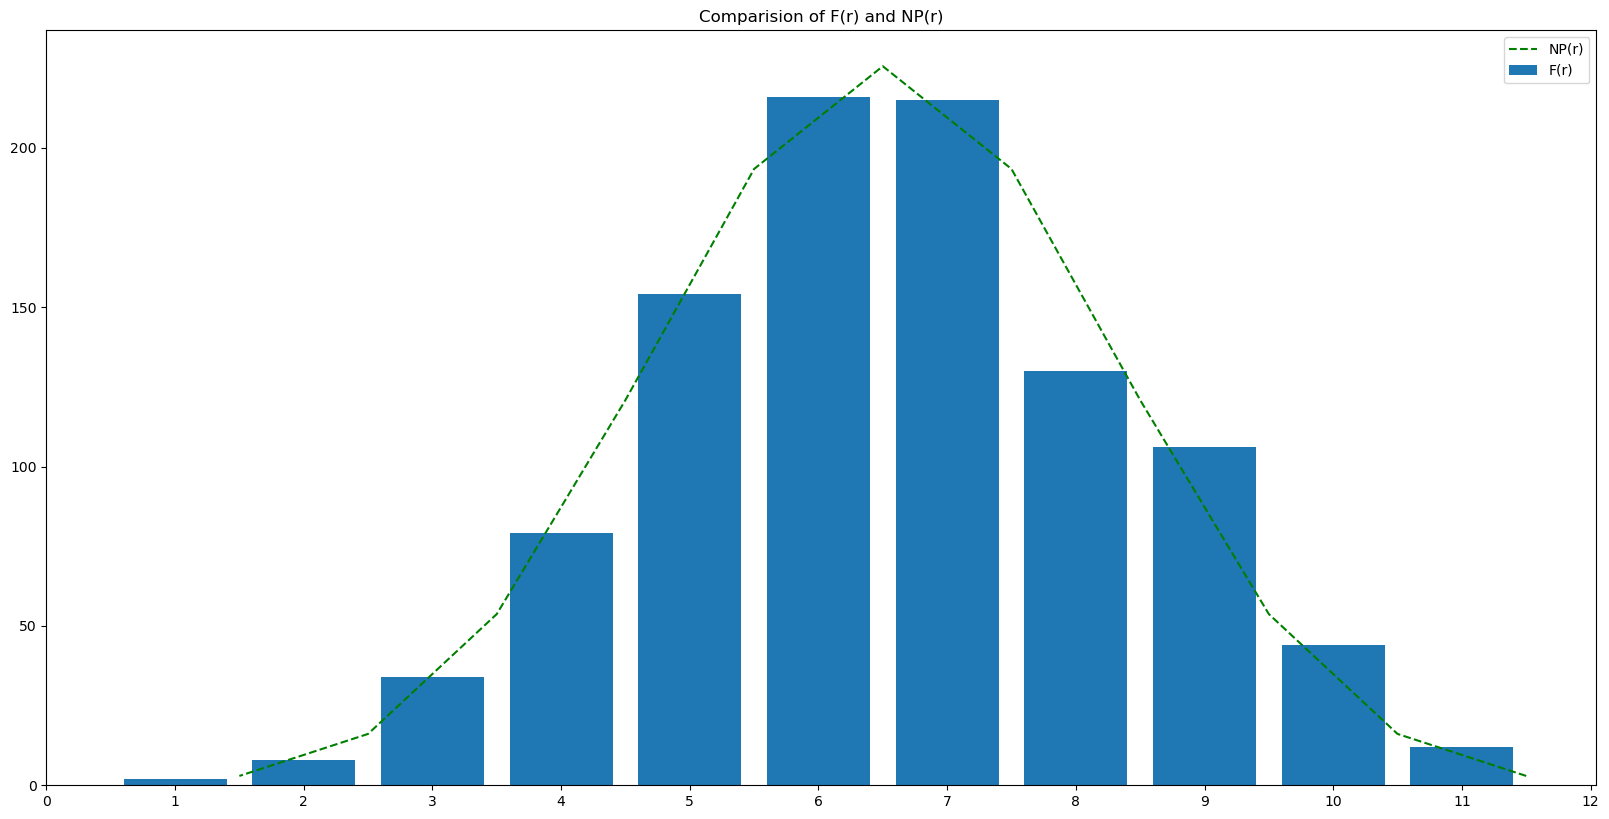

In [18]:
sample_space =[]
sample_space_sum = []
for i in range(trials) :
    sample_space.append(np.random.randint(2, size=coins+1))
for i in range(trials) :
    sample_space_sum.append(sample_space[i].sum())
sample_space_sum  = np.array(sample_space_sum)
sample_space_count = collections.Counter(sample_space_sum)
NP_r_dict = NP_r(sample_space_count, coins, trials)
plt.figure(figsize=(20,10), dpi=100)
plt.title("Comparision of F(r) and NP(r)")
plt.bar(sample_space_count.keys(), sample_space_count.values(), label = "F(r)")
plt.plot(NP_r_dict[0]+0.5, NP_r_dict[1], 'g--', label = "NP(r)")
plt.xticks(np.arange(coins+1))
plt.legend()
plt.show()

In [19]:
NP_r_dict[0], NP_r_dict[len(NP_r_dict)-1] = NP_r_dict[len(NP_r_dict)-1], NP_r_dict[0]
NP_r_dict[2], NP_r_dict[1] = NP_r_dict[1], NP_r_dict[2]
NP_r_dict[3], NP_r_dict[2] = NP_r_dict[2], NP_r_dict[3]
NP_r_dict[5], NP_r_dict[3] = NP_r_dict[3], NP_r_dict[5]

In [20]:
fields = ['#Heads Up (r)', 'Frequency F(r)', 'r!', '#Tails up (n-r)', '(n-r)!', 'NP(r)']
pd.DataFrame(np.transpose(NP_r_dict), columns = fields)

,#Heads Up (r),Frequency F(r),r!,#Tails up (n-r),(n-r)!,NP(r)
0,1.0,2.0,1.0,11.0,39916800.0,2.929688
1,2.0,8.0,2.0,10.0,3628800.0,16.113281
2,3.0,34.0,6.0,9.0,362880.0,53.710938
3,4.0,79.0,24.0,8.0,40320.0,120.849609
4,5.0,154.0,120.0,7.0,5040.0,193.359375
5,6.0,216.0,720.0,6.0,720.0,225.585938
6,7.0,215.0,5040.0,5.0,120.0,193.359375
7,8.0,130.0,40320.0,4.0,24.0,120.849609
8,9.0,106.0,362880.0,3.0,6.0,53.710938
9,10.0,44.0,3628800.0,2.0,2.0,16.113281
